In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [7]:
df = pd.read_csv('./data/data.csv')
sizebefore = len(df)
df = df.drop(columns=['store_and_fwd_flag', 'improvement_surcharge', 'mta_tax', 'congestion_surcharge'])
df = df.dropna()
df = df[df.total_amount >= 0]
monthpick = pd.to_datetime(df['tpep_pickup_datetime']).dt.month
monthdrop = pd.to_datetime(df['tpep_dropoff_datetime']).dt.month
df = df.loc[monthpick == 12]
df = df.loc[monthdrop == 12]


sizeafter = len(df)
ratio = sizeafter / sizebefore
print(ratio)
print(df['total_amount'])

df.to_csv('./data/cleaned.csv', index=False)

C:\Users\Arjan\AppData\Local\Temp\ipykernel_7056\4064772545.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/data.csv')


0.9545813282879582
0          15.40
1          31.05
2          10.56
3          13.80
4          10.56
           ...  
3273081    29.76
3273082    13.60
3273083    22.25
3273084    19.90
3273085    16.60
Name: total_amount, Length: 3245146, dtype: float64


In [8]:
df = pd.read_csv("./data/cleaned.csv")

print(df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-12-01 00:37:35   2022-12-01 00:47:35              1.0   
1         1  2022-12-01 00:34:35   2022-12-01 00:55:21              0.0   
2         1  2022-12-01 00:33:26   2022-12-01 00:37:34              1.0   
3         1  2022-12-01 00:45:51   2022-12-01 00:53:16              1.0   
4         2  2022-12-01 00:49:49   2022-12-01 00:54:13              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           2.00         1.0           170           237             1   
1           8.40         1.0           138           141             2   
2           0.80         1.0           140           140             1   
3           3.00         1.0           141            79             3   
4           0.76         1.0           261           231             1   

   fare_amount  extra  tip_amount  tolls_amount  total_amount  airport_fee  
0          8.5   3.00      

In [10]:
df['datetime'] = df['tpep_dropoff_datetime'].astype(str).str[0:13]

print(df['datetime'])

0          2022-12-01 00
1          2022-12-01 00
2          2022-12-01 00
3          2022-12-01 00
4          2022-12-01 00
               ...      
3245141    2022-12-31 23
3245142    2022-12-31 23
3245143    2022-12-31 23
3245144    2022-12-31 23
3245145    2022-12-31 23
Name: datetime, Length: 3245146, dtype: object


In [11]:
aggregated = df.groupby(df['datetime'])['total_amount'].agg(['sum', 'mean', 'max'])[2:]
aggregated = aggregated[:len(aggregated)-22]
print(aggregated)

                     sum       mean     max
datetime                                   
2022-12-01 02   17290.50  23.653215  488.10
2022-12-01 03   10325.72  25.749925  142.42
2022-12-01 04    9689.81  26.991114  130.30
2022-12-01 05   16066.60  28.588256  200.80
2022-12-01 06   31700.73  19.604657  144.96
...                  ...        ...     ...
2022-12-30 21  135871.06  30.684521  252.25
2022-12-30 22  134282.88  30.511902  331.20
2022-12-30 23  139666.53  31.584471  151.00
2022-12-31 00  123287.17  29.866078  173.80
2022-12-31 01   90197.83  28.498524  247.25

[720 rows x 3 columns]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[  0.]
 [  1.]
 [  2.]
 [  3.]
 [  4.]
 [  5.]
 [  6.]
 [  7.]
 [  8.]
 [  9.]
 [ 10.]
 [ 11.]
 [ 12.]
 [ 13.]
 [ 14.]
 [ 15.]
 [ 16.]
 [ 17.]
 [ 18.]
 [ 19.]
 [ 20.]
 [ 21.]
 [ 22.]
 [ 23.]
 [ 24.]
 [ 25.]
 [ 26.]
 [ 27.]
 [ 28.]
 [ 29.]
 [ 30.]
 [ 31.]
 [ 32.]
 [ 33.]
 [ 34.]
 [ 35.]
 [ 36.]
 [ 37.]
 [ 38.]
 [ 39.]
 [ 40.]
 [ 41.]
 [ 42.]
 [ 43.]
 [ 44.]
 [ 45.]
 [ 46.]
 [ 47.]
 [ 48.]
 [ 49.]
 [ 50.]
 [ 51.]
 [ 52.]
 [ 53.]
 [ 54.]
 [ 55.]
 [ 56.]
 [ 57.]
 [ 58.]
 [ 59.]
 [ 60.]
 [ 61.]
 [ 62.]
 [ 63.]
 [ 64.]
 [ 65.]
 [ 66.]
 [ 67.]
 [ 68.]
 [ 69.]
 [ 70.]
 [ 71.]
 [ 72.]
 [ 73.]
 [ 74.]
 [ 75.]
 [ 76.]
 [ 77.]
 [ 78.]
 [ 79.]
 [ 80.]
 [ 81.]
 [ 82.]
 [ 83.]
 [ 84.]
 [ 85.]
 [ 86.]
 [ 87.]
 [ 88.]
 [ 89.]
 [ 90.]
 [ 91.]
 [ 92.]
 [ 93.]
 [ 94.]
 [ 95.]
 [ 96.]
 [ 97.]
 [ 98.]
 [ 99.]
 [100.]
 [101.]
 [102.]
 [103.]
 [104.]
 [105.]
 [106.]
 [107.]
 [108.]
 [109.]
 [110.]
 [111.]
 [112.]
 [113.]
 [114.]
 [115.]
 [116.]
 [117.]
 [118.]
 [119.]
 [120.]
 [121.]
 [122.]
 [123.]
 [124.]


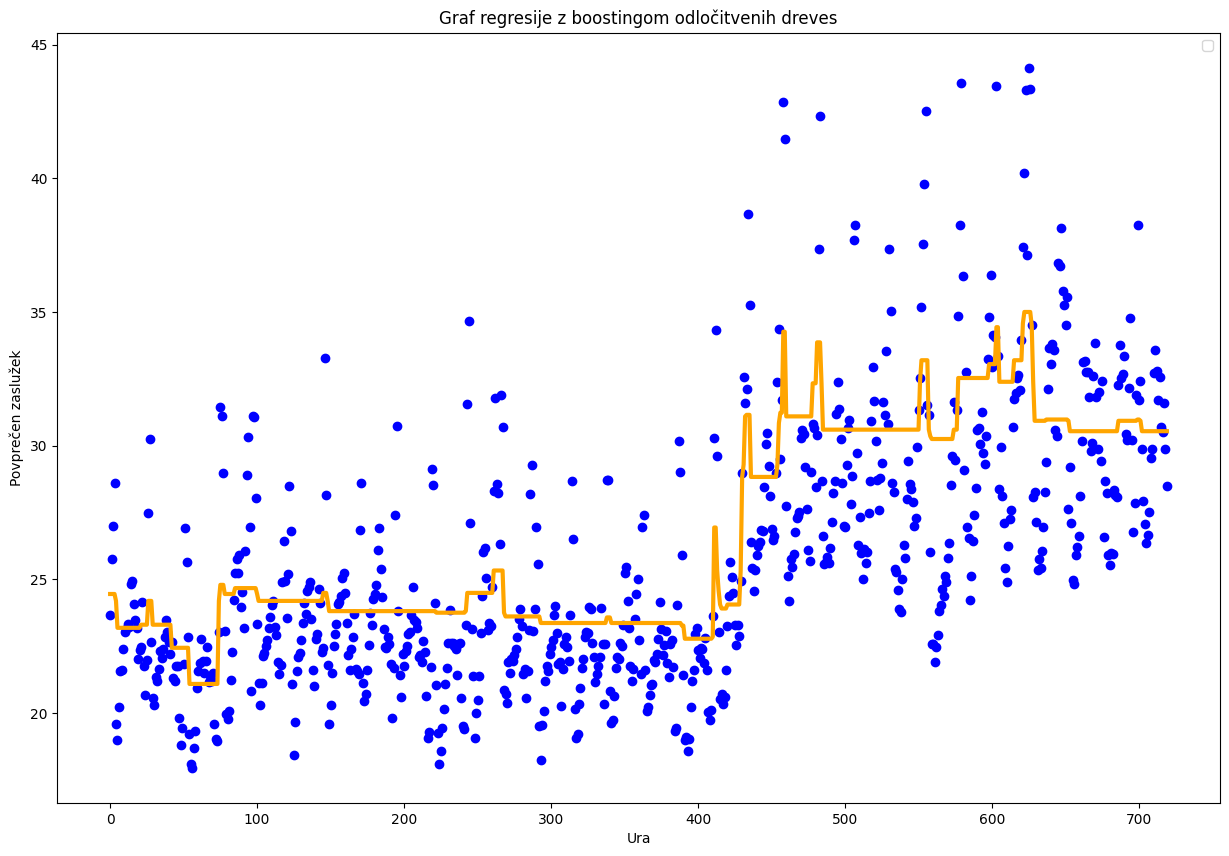

In [13]:
#x = range(0, len(aggregated))
y = aggregated['mean']
x = np.empty([0,1])



for i in range(len(y)):
    x = np.append(x, np.array([[ i ]]), axis=0)



regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=100, random_state=42)


regr.fit(x, y)


y_reg = regr.predict(x)


plt.figure(figsize=(15,10))
plt.scatter(x, y, color='blue')
plt.plot(x, y_reg, color='orange', linewidth=3)
plt.xlabel("Ura")
plt.ylabel("Povprečen zaslužek")
plt.title("Graf regresije z boostingom odločitvenih dreves")
plt.legend()
plt.show()